In [21]:
%pylab inline
import GPy
import numpy as np
import matplotlib;matplotlib.rcParams['figure.figsize']=(10,6)
from matplotlib import pyplot as plt
from scipy import optimize
np.random.seed(101)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


*Set up a simple problem*

In [22]:
N = 50
noise_var = 0.05

X = np.linspace(0,10,N)[:,None]
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x10b78c850>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x10b771f10>],
  [<matplotlib.lines.Line2D at 0x10b781d50>]]}

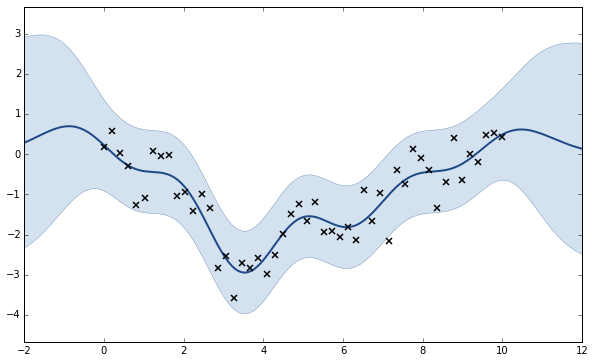

In [23]:
m_full = GPy.models.GPRegression(X,y)
m_full.optimize('bfgs')
m_full.plot()

In [4]:
Z = np.hstack((np.linspace(2.5,4.,3),np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,Z=Z)
m.likelihood.variance = noise_var
m.Z.fix()


array([0, 1, 2, 3, 4, 5])

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x108d76e50>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x108d69550>],
 'inducing_inputs': [<matplotlib.lines.Line2D at 0x108d69510>]}

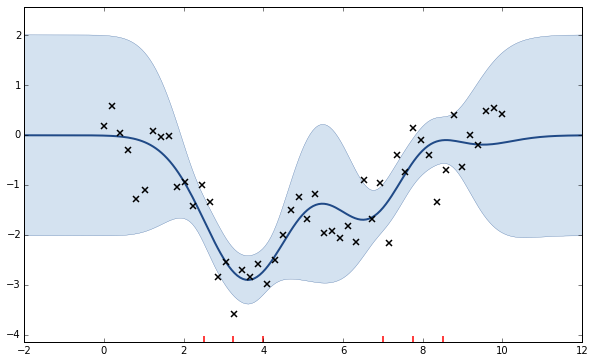

In [5]:
m.plot()

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x108f34b50>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x108f26250>],
 'inducing_inputs': [<matplotlib.lines.Line2D at 0x108f26210>]}

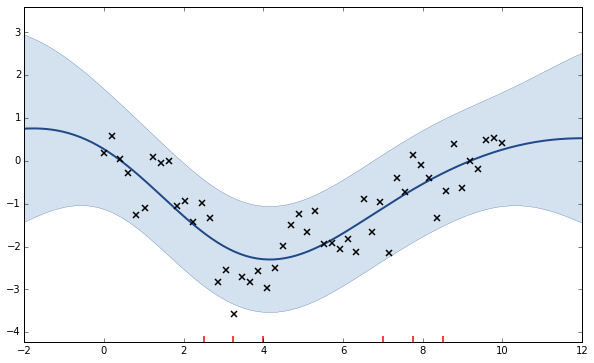

In [6]:
m.optimize('bfgs')
m.plot()

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x1090c8b90>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x1090bc290>],
 'inducing_inputs': [<matplotlib.lines.Line2D at 0x1090bc250>]}

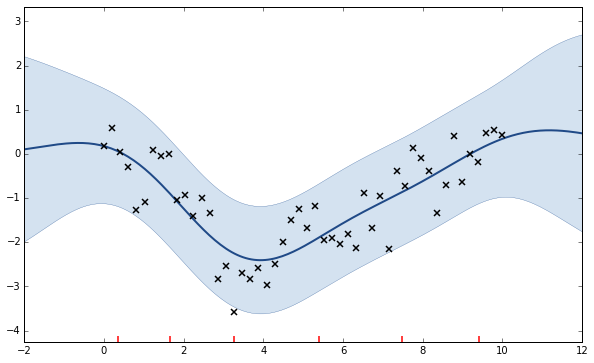

In [7]:
m.randomize()
m.Z.unfix()
m.optimize('bfgs')
m.plot()

[[-50.08617051]] -50.0860723469

Name                              : sparse gp
Log-likelihood                    : -50.0861705091
Number of Parameters              : 103
Number of Optimization Parameters : 103
Updates                           : True
Parameters:
  sparse_gp.               |      Value       |  Constraint  |  Prior  |  Tied to
  inducing inputs          |        (100, 1)  |              |         |         
  rbf.variance             |   1.65830098208  |     +ve      |         |         
  rbf.lengthscale          |    1.1122056777  |     +ve      |         |         
  Gaussian_noise.variance  |  0.236137213045  |     +ve      |         |         


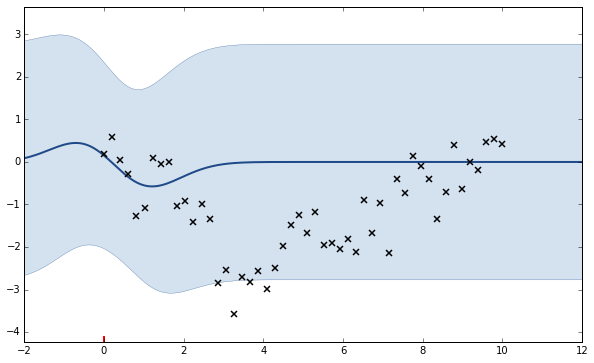

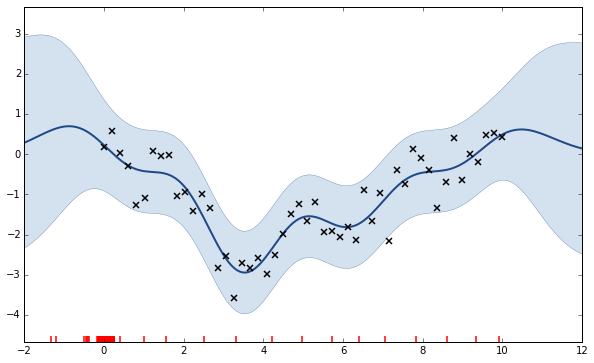

In [28]:

M = 100
m = GPy.models.SparseGPRegression(X,y,Z=np.random.rand(M,1)*0.01)
m.plot()

m.optimize('bfgs')
m.plot()
print m.log_likelihood(), m_full.log_likelihood()
print m

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x10e903b90>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x10e8f5290>],
  [<matplotlib.lines.Line2D at 0x10e9030d0>]]}

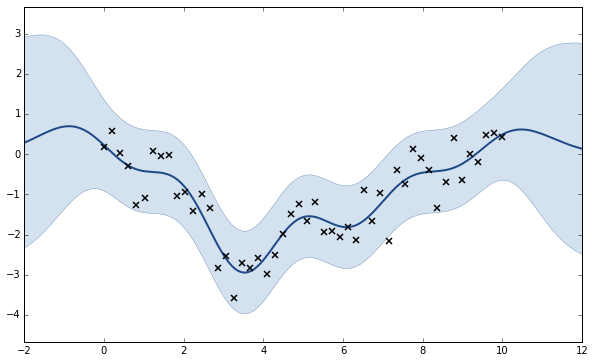

In [29]:
m_full.plot()

Non-Gaussian
--

In [16]:
X = np.random.rand(100,1)*12
f = np.cos(X/3)*3.8
p =np.exp(f)/(1+np.exp(f))
Y = np.where(p>np.random.rand(*p.shape), 1,0)
M=10
Z=np.random.rand(M,1)*12

In [17]:
m = GPy.core.SVGP(X, Y, kernel=GPy.kern.RBF(1)+GPy.kern.White(1), likelihood=GPy.likelihoods.Bernoulli(), Z=Z)

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x10a9a8150>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x1087cb810>],
 'inducing_inputs': [<matplotlib.lines.Line2D at 0x1087cb7d0>]}

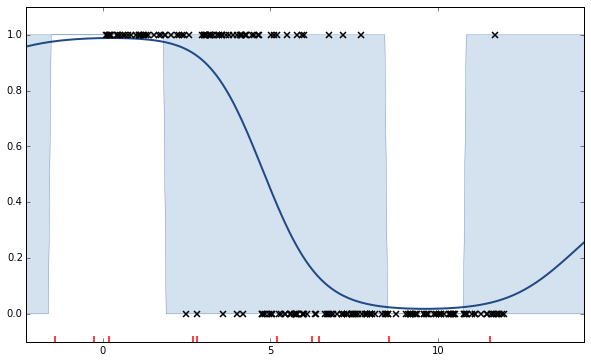

In [18]:
m.optimize('bfgs')
m.plot()
#plt.plot(X, p, 'r.')

In [19]:
m_full = GPy.models.GPVariationalGaussianApproximation(X, Y, kernel=GPy.kern.RBF(1)+GPy.kern.White(1), likelihood=GPy.likelihoods.Bernoulli())

{'dataplot': {'dataplot': [[<matplotlib.lines.Line2D at 0x10c00b210>]]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x10bff0910>],
  [<matplotlib.lines.Line2D at 0x10bfff710>]]}

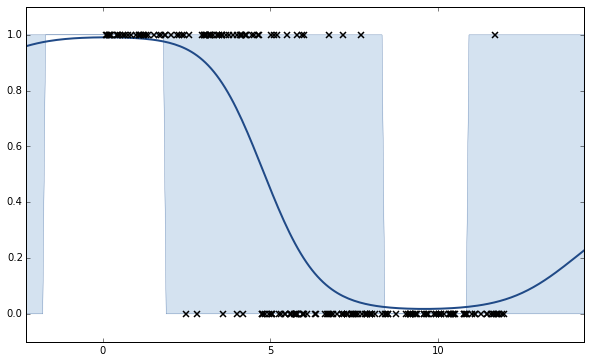

In [20]:
m_full.optimize()
m_full.plot()